<a href="https://colab.research.google.com/github/vipin-jangra/machine_leaning/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>epoch=0,error=2.078
>epoch=10000,error=1.815
>epoch=20000,error=0.775
>epoch=30000,error=0.441
>epoch=40000,error=0.296
>epoch=50000,error=0.218
>epoch=60000,error=0.171
>epoch=70000,error=0.140
>epoch=80000,error=0.118
>epoch=90000,error=0.101


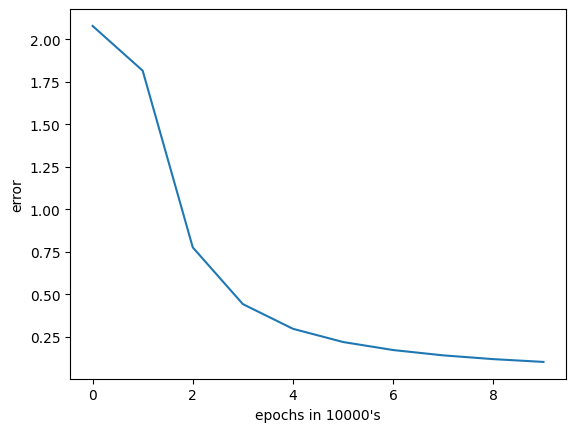

1
Layer 1 
neuron 1 : {'weights': array([8.00725262, 8.01171824]), 'result': 0.9996670724299447, 'delta': -7.90701621602461e-08}
neuron 2 : {'weights': array([0.9127088 , 0.91257428]), 'result': 0.7135541463431602, 'delta': 0.108818099158055}
Layer 2 
neuron 1 : {'weights': array([-21.56537158,  27.20311496]), 'result': 0.10458413438067209, 'delta': 0.016600291194440217}
neuron 2 : {'weights': array([ 21.56337078, -27.20057165]), 'result': 0.8953985071611207, 'delta': -0.016605196729076323}


In [1]:
import numpy as np
import matplotlib.pyplot as plt

XORdata = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])
x = XORdata[:,0:2]
y = XORdata[:,-1]

def print_network(net):
    for i,layer in enumerate(net,1):
        print("Layer {} ".format(i))
        for j,neuron in enumerate(layer,1):
            print("neuron {} :".format(j),neuron)

def initialize_network():
    input_neurons = len(x[0])
    hidden_neurons = input_neurons + 1
    output_neurons = 2
    
    n_hidden_layers = 1
    net = list()
    
    for h in range(n_hidden_layers):
        if h!=0:
            input_neurons = len(net[-1])
            
        hidden_layer = [{'weights':np.random.uniform(size=input_neurons)} for i in range(input_neurons)]
        net.append(hidden_layer)
        
    output_layer = [{'weights':np.random.uniform(size=output_neurons)} for i in range(output_neurons)]
    net.append(output_layer)
    
    return net

net=initialize_network()

def activate_sigmoid(sum):
    return (1/(1+np.exp(-sum)))

def forward_propagation(net,input):
    row = input
    for layer in net:
        prev_input = np.array([])
        for neuron in layer:
            sum = neuron['weights'].T.dot(row)
            
            result = activate_sigmoid(sum)
            neuron['result'] = result
            
            prev_input = np.append(prev_input,[result])
        row = prev_input
        
    return row

def sigmoidDerivative(output):
    return output*(1.0-output)

def back_propagation(net,row,expected):
    for i in reversed(range(len(net))):
        layer = net[i]
        errors = np.array([])
        if i == len(net) - 1:
            results = [neuron['result'] for neuron in layer]
            errors = expected-np.array(results)
        else:
            for j in range(len(layer)):
                herror = 0
                nextlayer = net[i+1]
                for neuron in nextlayer:
                    herror+=(neuron['weights'][j]*neuron['delta'])
                errors = np.append(errors,[herror])
           
        for j in range(len(layer)):
            neuron=layer[j]
            neuron['delta']=errors[j]*sigmoidDerivative(neuron['result'])
            
def updateWeights(net,input,lrate):
    
    for i in range(len(net)):
        inputs = input
        if i!=0:
            inputs=[neuron['result'] for neuron in net[i-1]]

        for neuron in net[i]:
            for j in range(len(inputs)):
                neuron['weights'][j]+=lrate*neuron['delta']*inputs[j]
                
def training(net, epochs,lrate,n_outputs):
    errors=[]
    for epoch in range(epochs):
        sum_error=0
        for i,row in enumerate(x):
            outputs=forward_propagation(net,row)
            
            expected=[0.0 for i in range(n_outputs)]
            expected[y[i]]=1
    
            sum_error+=sum([(expected[j]-outputs[j])**2 for j in range(len(expected))])
            back_propagation(net,row,expected)
            updateWeights(net,row,0.05)
        if epoch%10000 ==0:
            print('>epoch=%d,error=%.3f'%(epoch,sum_error))
            errors.append(sum_error)
    return errors

errors=training(net,100000, 0.05,2)

epochs=[0,1,2,3,4,5,6,7,8,9]
plt.plot(epochs,errors)
plt.xlabel("epochs in 10000's")
plt.ylabel('error')
plt.show()

def predict(network, row):
    outputs = forward_propagation(net, row)
    return outputs

pred=predict(net,np.array([1,0]))
output=np.argmax(pred)
print(output)

print_network(net)